In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv('train_data.csv',header=0,sep=',',index_col=0)
validation_data=pd.read_csv('validation_data.csv',header=0,sep=',',index_col=0)
train_validation_data=pd.read_csv('train_validation_data.csv',header=0,sep=',',index_col=0)
test_data=pd.read_csv('test_data.csv',header=0,sep=',',index_col=0)

x_train=train_data.drop('shares',axis=1)
y_train=train_data['shares']
x_validation=validation_data.drop('shares',axis=1)
y_validation=validation_data['shares']
x_train_validation=train_validation_data.drop('shares',axis=1)
y_train_validation=train_validation_data['shares']
x_test=test_data.drop('shares',axis=1)
y_test=test_data['shares']

In [3]:
# Build the random forest classifier function

def GB(d,l):
    gb=GradientBoostingClassifier(n_estimators=200,max_depth=d,min_samples_leaf=l)
    gb.fit(x_train,y_train)
    
    #auc score
    gb_auc=roc_auc_score(y_validation,gb.predict_proba(x_validation)[:,1])
    
    #tpr
    gb_true_positive=confusion_matrix(y_validation,gb.predict(x_validation))[1][1]
    gb_false_negative=confusion_matrix(y_validation,gb.predict(x_validation))[1][0]
    gb_true_positive_rate=gb_true_positive/(gb_true_positive+gb_false_negative)
    
    return gb_auc,gb_true_positive_rate

In [4]:
# Convert all auc_score and tpr to a dataframe

dict_gb={'max_depth':[],'min_samples_leaf':[],'auc_score':[],'tpr':[]}


d_list=[10,100,1000,2000]
l_list=[10,100,1000,2000]

for d in d_list:
    for l in l_list:
        auc_score,tpr=GB(d,l)
            
        dict_gb['max_depth'].append(d)
        dict_gb['min_samples_leaf'].append(l)
        dict_gb['auc_score'].append(auc_score)
        dict_gb['tpr'].append(tpr)

df_gb=pd.DataFrame(dict_gb)

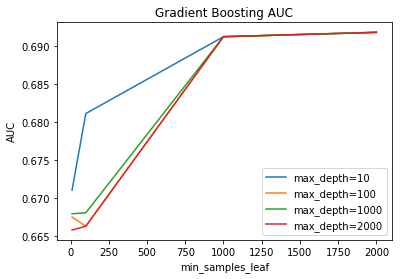

In [5]:
# draw plots for auc and tpr based on hyperparameter choices

for d in d_list:
    plt.plot(l_list,df_gb[df_gb['max_depth']==d]['auc_score'],label='max_depth='+str(d))

plt.title('Gradient Boosting AUC')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC')
plt.legend()

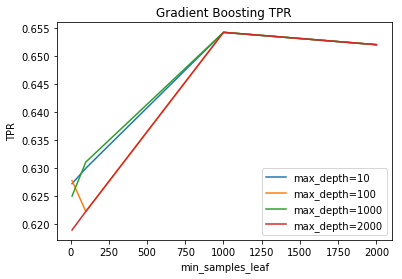

In [6]:
for d in d_list:
    plt.plot(l_list,df_gb[df_gb['max_depth']==d]['tpr'],label='max_depth='+str(d))

plt.title('Gradient Boosting TPR')
plt.xlabel('min_samples_leaf')
plt.ylabel('TPR')
plt.legend()

In [7]:
# Find the best hyperparameter for the best auc

max_depth1=df_gb[df_gb['auc_score']==df_gb['auc_score'].max()]['max_depth'].iloc[0]
min_samples_leaf1=df_gb[df_gb['auc_score']==df_gb['auc_score'].max()]['min_samples_leaf'].iloc[0]
print('best auc based max depth='+str(max_depth1))
print('best auc based min_samples_leaf='+str(min_samples_leaf1))

best auc based max depth=10
best auc based min_samples_leaf=2000


best auc based auc is 0.7073752781777056
best auc based tpr is 0.6806806806806807


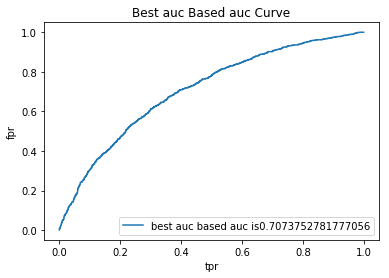

In [8]:
#Fit again in train_validation_data and test in test data

gb1=GradientBoostingClassifier(n_estimators=200,max_depth=max_depth1,min_samples_leaf=min_samples_leaf1)
gb1.fit(x_train_validation,y_train_validation)

gb1_tpr,gb1_fpr,_=roc_curve(y_test,gb1.predict_proba(x_test)[:,1])
gb1_auc=roc_auc_score(y_test,gb1.predict_proba(x_test)[:,1])
plt.plot(gb1_tpr,gb1_fpr,label='best auc based auc is'+str(gb1_auc))
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.title('Best auc Based auc Curve')
plt.legend()

gb1_true_positive=confusion_matrix(y_test,gb1.predict(x_test))[1][1]
gb1_false_negative=confusion_matrix(y_test,gb1.predict(x_test))[1][0]
gb1_true_positive_rate=gb1_true_positive/(gb1_true_positive+gb1_false_negative)

print('best auc based auc is '+str(gb1_auc))
print('best auc based tpr is '+str(gb1_true_positive_rate))

In [9]:
# Find the best hyperparameter for the best tpr

max_depth2=df_gb[df_gb['tpr']==df_gb['tpr'].max()]['max_depth'].iloc[0]
min_samples_leaf2=df_gb[df_gb['tpr']==df_gb['tpr'].max()]['min_samples_leaf'].iloc[0]
print('best tpr based max depth='+str(max_depth2))
print('best tpr based min_samples_leaf='+str(min_samples_leaf2))

best tpr based max depth=10
best tpr based min_samples_leaf=1000


best tpr based auc is 0.7061208207533225
best tpr based tpr is 0.6796796796796797


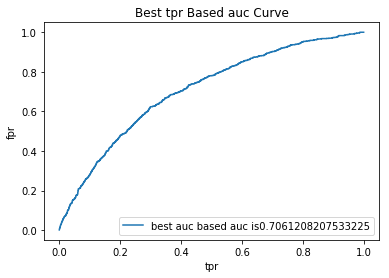

In [10]:
# Fit again in train_validation_data and test in test data

gb2=GradientBoostingClassifier(n_estimators=200,max_depth=max_depth2,min_samples_leaf=min_samples_leaf2)
gb2.fit(x_train_validation,y_train_validation)

gb2_tpr,gb2_fpr,_=roc_curve(y_test,gb2.predict_proba(x_test)[:,1])
gb2_auc=roc_auc_score(y_test,gb2.predict_proba(x_test)[:,1])
plt.plot(gb2_tpr,gb2_fpr,label='best auc based auc is'+str(gb2_auc))
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.title('Best tpr Based auc Curve')
plt.legend()

gb2_true_positive=confusion_matrix(y_test,gb2.predict(x_test))[1][1]
gb2_false_negative=confusion_matrix(y_test,gb2.predict(x_test))[1][0]
gb2_true_positive_rate=gb2_true_positive/(gb2_true_positive+gb2_false_negative)

print('best tpr based auc is '+str(gb2_auc))
print('best tpr based tpr is '+str(gb2_true_positive_rate))